In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')


In [4]:
df.shape

(404290, 6)

In [5]:
df.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
new_df=df.sample(30000,random_state=2)


In [8]:
new_df.isnull().sum()


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
new_df.head()



,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [10]:
new_df.duplicated().sum()

0

Count of duplicate and non-duplicate questions:
is_duplicate
0    19013
1    10987
Name: count, dtype: int64

Percentage of duplicate and non-duplicate questions:
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


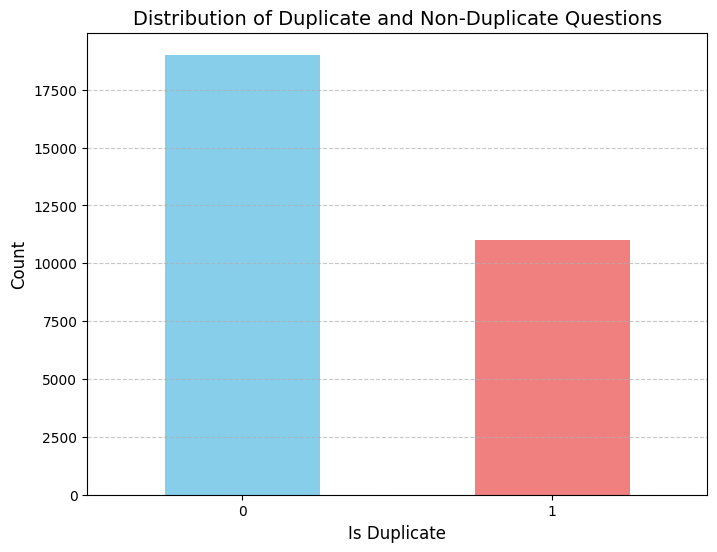

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame and it has a column 'is_duplicate'
# Calculate the count of duplicate and non-duplicate questions
duplicate_counts = new_df['is_duplicate'].value_counts()

# Calculate the percentage of duplicate and non-duplicate questions
duplicate_percentages = (duplicate_counts / new_df['is_duplicate'].count()) * 100

# Print the counts and percentages
print("Count of duplicate and non-duplicate questions:")
print(duplicate_counts)
print("\nPercentage of duplicate and non-duplicate questions:")
print(duplicate_percentages)

# Plot the distribution of duplicate and non-duplicate questions
plt.figure(figsize=(8, 6))
duplicate_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Is Duplicate', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Duplicate and Non-Duplicate Questions', fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

In [15]:
# Repeated questions
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()
print('Number of questions getting repeated', x[x > 1].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


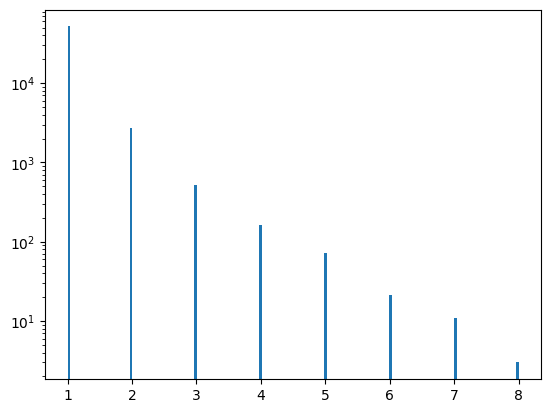

In [16]:
#Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [17]:
#Feature engineering 

new_df['q1_len']=new_df['question1'].str.len()  #making new column called q1_len
new_df['q2_len']=new_df['question2'].str.len()

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [23]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" "))) #Counting the words by splitting the text 
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" "))) #

In [24]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [25]:
#let's find the common words =---- new feature 


In [26]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))   #strip removes the leading whitespaces 
    w2=set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    return len(w1 &  w2)

In [27]:
new_df['word_common']= new_df.apply(common_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5


In [28]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

In [29]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,13


In [30]:
new_df['word_share'] = round(new_df['word_common'] / new_df['word_total'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,24,0.50
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10,23,0.43
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20,34,0.59
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11,32,0.34
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,13,0.38


minimum characters 2
maximum characters 391
average num of characters 59


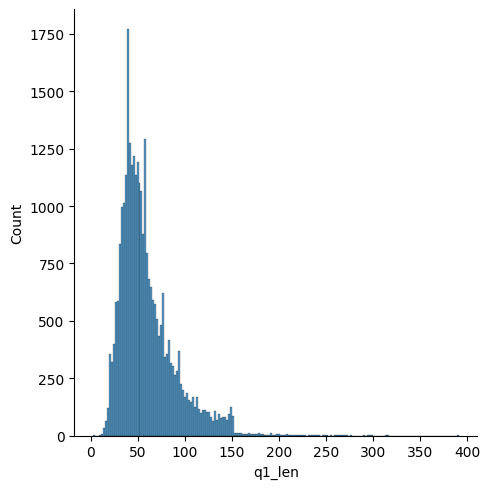

In [31]:

# Analysis of features
sns.displot(new_df['q1_len'])

print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


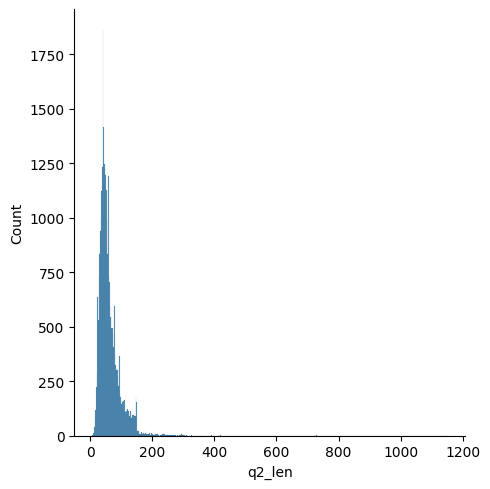

In [32]:

# Analysis of features
sns.displot(new_df['q2_len'])

print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


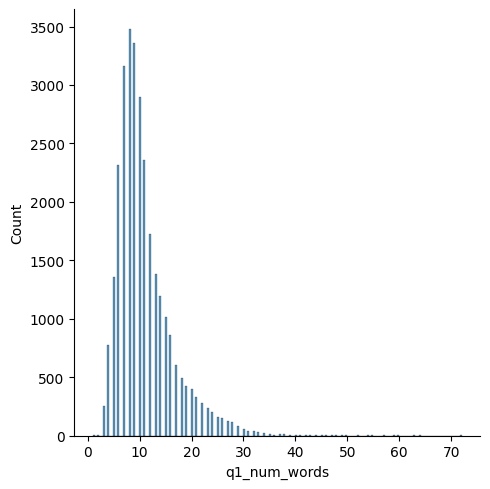

In [33]:
sns.displot(new_df['q1_num_words'])

print('minimum words', new_df['q1_num_words'].min())
print('maximum words', new_df['q1_num_words'].max())
print('average num of words', int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


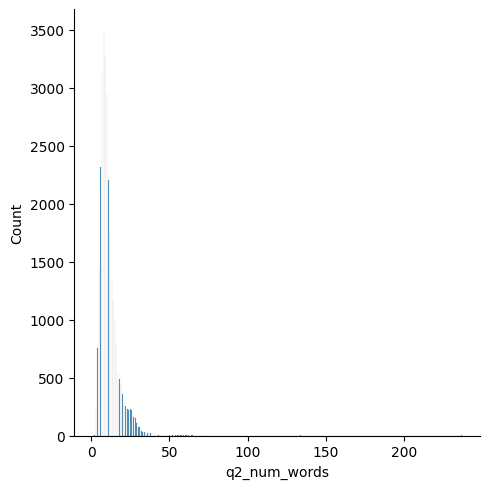

In [34]:
sns.displot(new_df['q2_num_words'])

print('minimum words', new_df['q2_num_words'].min())
print('maximum words', new_df['q2_num_words'].max())
print('average num of words', int(new_df['q2_num_words'].mean()))

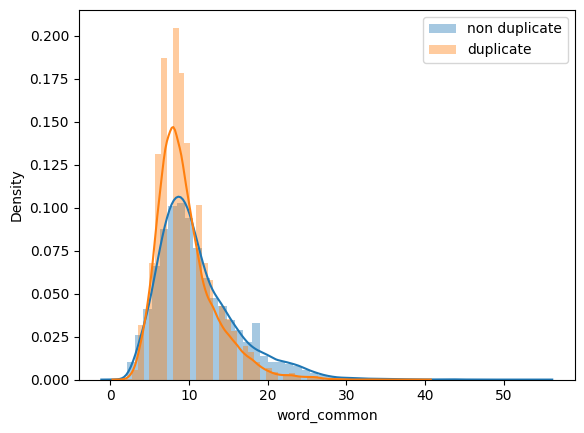

In [35]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label='duplicate')

plt.legend()
plt.show()

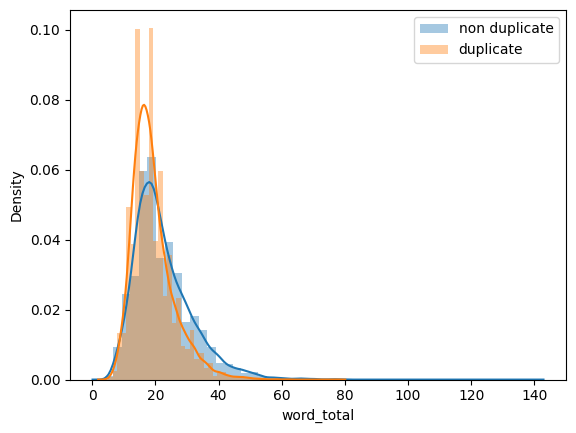

In [36]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'], label='duplicate')

plt.legend()
plt.show()

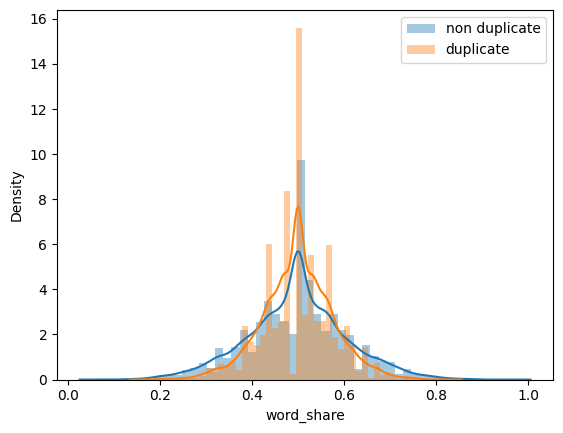

In [37]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label='duplicate')

plt.legend()
plt.show()

In [39]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [40]:
final_df = new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,12,24,0.50
115086,0,49,57,12,15,10,23,0.43
327711,0,105,120,25,17,20,34,0.59
367788,0,59,146,12,30,11,32,0.34
151235,0,35,50,5,9,5,13,0.38


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [42]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [43]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,12,24,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,20,34,0.59,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,11,32,0.34,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,5,13,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7393333333333333

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7336666666666667